In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
data=pd.read_csv('/content/dataset.csv')
dct={}

In [ ]:
data.shape

(114000, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
data.drop(["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo"],axis=1,inplace=True)
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,4,acoustic


In [ ]:
data.drop(["album_name","track_name","popularity","duration_ms","Unnamed: 0"],axis=1,inplace=True)
data.head()

,track_id,artists,explicit,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,False,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,False,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,False,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,False,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,False,4,acoustic


In [ ]:
data.drop(["artists","time_signature"],axis=1,inplace=True)
data.head()

,track_id,explicit,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,False,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,False,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,False,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,False,acoustic
4,5vjLSffimiIP26QG5WcN2K,False,acoustic


In [ ]:
import string

def punctuation_remover(txt):
    lst = [char for char in txt if char not in string.punctuation]
    after_removing = ''.join(lst)
    return after_removing

data['track_id'] = data['track_id'].apply(punctuation_remover)

data.head()

,track_id,explicit,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,False,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,False,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,False,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,False,acoustic
4,5vjLSffimiIP26QG5WcN2K,False,acoustic


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop = sw.words('english')

data['track_id'] = data['track_id'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,track_id,explicit,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,False,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,False,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,False,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,False,acoustic
4,5vjLSffimiIP26QG5WcN2K,False,acoustic


In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['track_id'], data.label, test_size=0.2, random_state=42)

AttributeError: ignored

In [ ]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 80.82%


Confusion matrix, without normalization


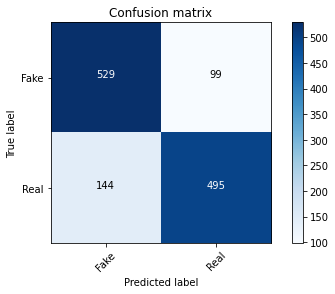

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
#SVM

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 94.4%


Confusion matrix, without normalization


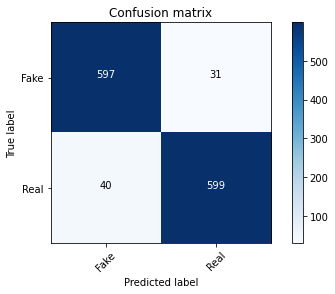

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
# Logistic regression

# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 92.42%


Confusion matrix, without normalization


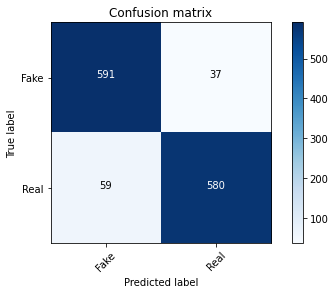

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 90.37%


Confusion matrix, without normalization


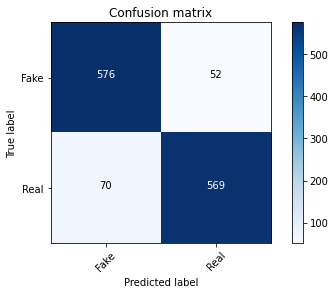

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 84.37%


Confusion matrix, without normalization


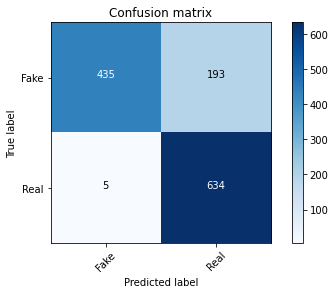

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

([<matplotlib.axis.YTick at 0x7f7eb1c9b750>,
 <a list of 9 Text major ticklabel objects>)

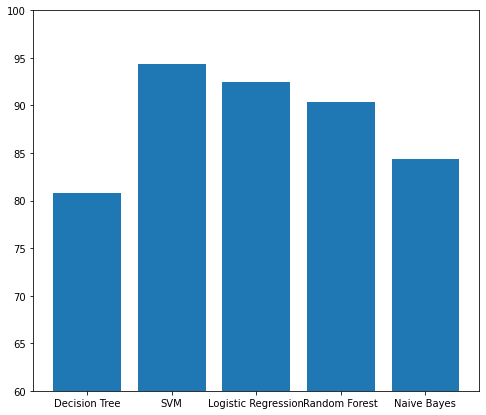

In [ ]:
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(60,100)
plt.yticks((60,65,70,75,80,85,90,95,100))